In [479]:
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np

In [480]:
data=pd.read_csv("D:\Kaggle\Linear Regression RFE(Recursive feature eimination)- CAR price prediction\CarPrice_Assignment.csv",delimiter=',')
data.head()  #prints first 5 rows
#print(data.head())
print(data.shape,data.size,data.ndim)
#data.shape() will raise error
#data.to_numpy()

(205, 26) 5330 2


In [481]:
#print(data.describe()) # gives mean, stdard deviation ,min,25percentile,50 percentile,75 percentile and max values of numerical data.
# it excludes the cloumns which contains the string object.

#data.describe(percentiles=[0.2,0.4,0.6,.8])   we can give percnetiles as our wish
include=['float','int','object']
data.describe(percentiles=[0.2,0.4,0.6,0.8],include='all') #returns NA for string objects   top is most common value


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
20%,41.800000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.050000,3.070000,8.500000,69.000000,4800.000000,19.000000,24.800000,7385.800000
40%,82.600000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.960000,...,109.000000,NaN,3.190000,3.230000,9.000000,87.200000,5000.000000,23.600000,29.000000,9036.600000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000


In [482]:
data.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [483]:
data.info() 
#data.info(verbose=False) # verbose is used for whether t print full summary or not. false means it won't print


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Data Cleaning and Preparation

In [484]:
#Splitting company name from car name column
company_name=data['CarName'].apply(lambda x:x.split(' ')[0]) #Split method retuens a list of strings after 
#breaking the given string by secified separator, here we used space as a separator
#company_name.dtype   data type is object i.e string
#print(company_name)
#data
#company_name
#company_name.insert(3,"CompanyName",company_name,allow_duplicates=False)    # error  series object has no attribute insert
data.insert(3,"CompanyName",company_name,allow_duplicates=True)
data.drop(labels=['CarName'],axis=1,inplace=True)  #axis=1 means column and 0 means row  ..inpalce True means makechanges in original dataframe
data

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [485]:
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [486]:
data.CompanyName.unique() #returns unique values of data in CompanyName column

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [487]:
data.CompanyName.unique().size

28

# Fixing invalid values

 maxda=mazda
 nissan=Nissan
 porsche=porcshce
 toyota=toyouta
 vokswagen=volkswagen=vw

In [488]:
data.CompanyName=data.CompanyName.str.lower() # converts all letters in CompanyName column into lowercase letters
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [489]:
data.CompanyName.replace("maxda","mazda",inplace=True)
#data.CompanyName.str.replace("Nissan","nissan")
data.CompanyName.replace("porcshce","porsche",inplace=True)
data.CompanyName.replace("toyouta","toyota",inplace=True)
data.CompanyName.replace("vokswagen","volkswagen",inplace=True)
data.CompanyName.replace("vw","volkswagen",inplace=True)


In [490]:
data.CompanyName[150]

'toyota'

In [491]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [492]:
data.loc[data.duplicated()]  #checking for duplicates by name of columns

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [493]:
data.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Visualizing the data


C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


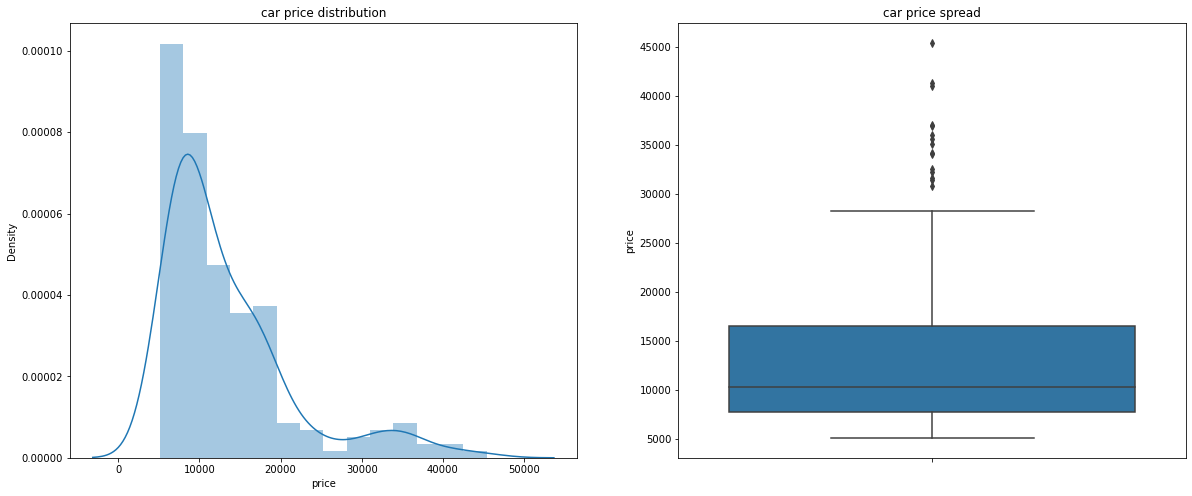

In [494]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("car price distribution")
sns.distplot(data.price)
#plt.show()
plt.subplot(1,2,2)  # will come in same row
plt.title("car price spread")
sns.boxplot(y=data.price)
plt.show()

In [495]:
#data[price].describe(percentiles=[0.25,0.5,0.75,0.85,0.9,1]) # raises error
data.price.describe(percentiles=[0.25,0.5,0.75,0.85,0.9,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

# 3.1 Visualizing Categorical Data
- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

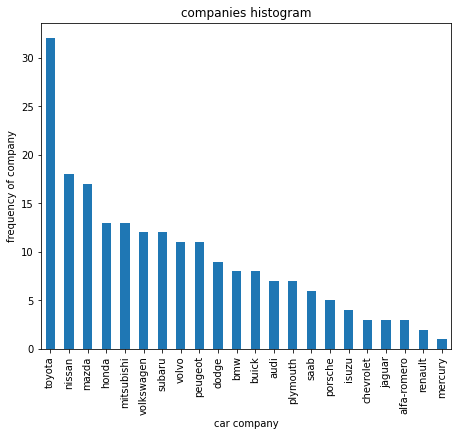

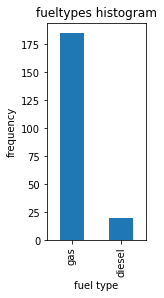

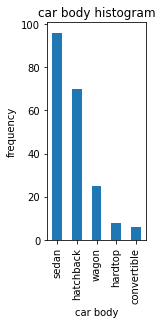

In [496]:
plt.figure(figsize=(25,6))
plt.subplot(1,3,1)
plt1=data.CompanyName.value_counts().plot(kind='bar')  #returns count of unique values  in dataframe.CompamnyNmae
plt1.set(xlabel="car company", ylabel="frequency of company")
plt.title("companies histogram")
plt.show()

plt.subplot(1,3,2)
plt2=data.fueltype.value_counts().plot(kind="bar")
plt2.set(xlabel="fuel type",ylabel="frequency")
plt.title("fueltypes histogram")
plt.show()

plt.subplot(1,3,3)
plt3=data.carbody.value_counts().plot(kind="bar")
plt3.set(xlabel="car body",ylabel="frequency") #plt3.title(xlabel="car body",ylabel="frequency") will raise an error
plt.title("car body histogram")
plt.show()



# Inference for above
- toyota is most favouered comapny
- gas is used by most
- sedan is the most frquent car body

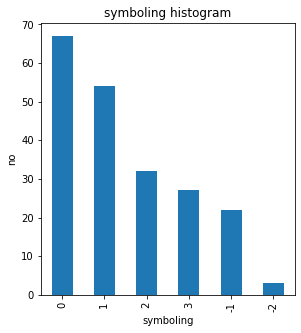

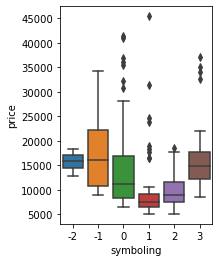

In [497]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt4=data.symboling.value_counts().plot(kind="bar")
plt4.set(xlabel="symboling", ylabel="no")
plt.title("symboling histogram")
plt.show()

plt.subplot(1,2,2)
#plt4.set(xlabel="symboling",ylabel="price")
#plt.title("symboling vs price")
sns.boxplot(x=data.symboling,y=data.price)
plt.show()



# Inference for above
- Symboling with 1 and 0 have more no.of rows
- symboling with -2 have least no.of rows.
- the price is more for symboling -1..the price is least for symboling 1
- symboling with 3 has price range similar to symboling with -2


C:\Users\prasa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


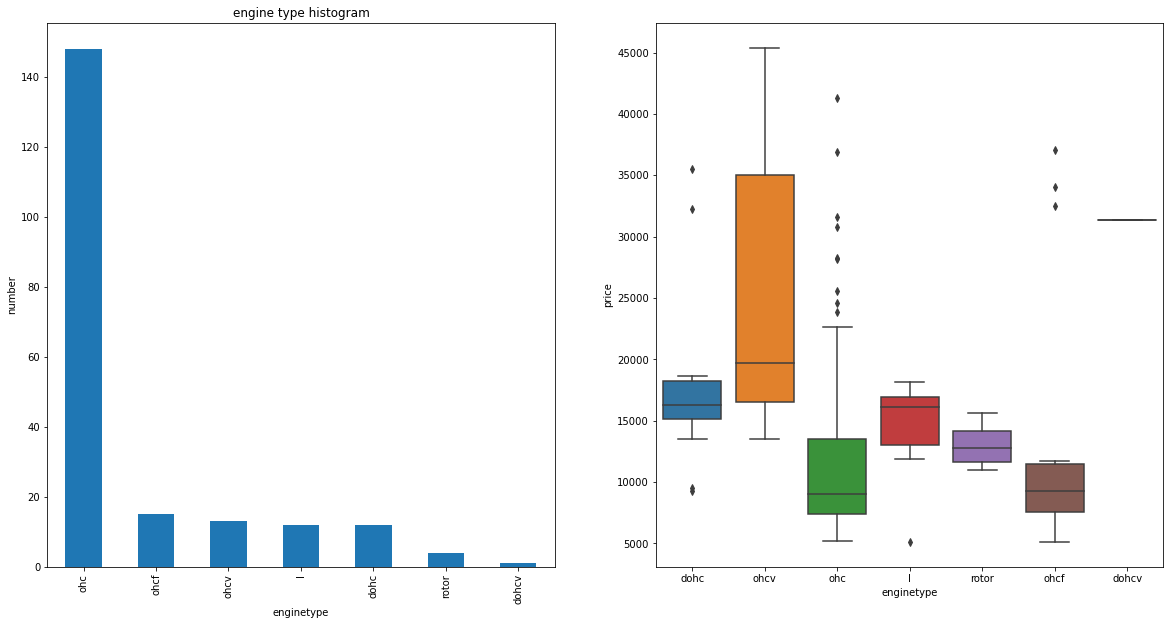

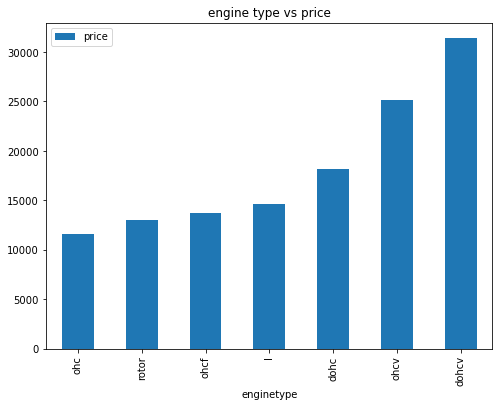

In [498]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("engine type histogram")
plt5=data.enginetype.value_counts().plot(kind="bar")
plt5.set(xlabel="enginetype",ylabel="number")
plt.subplot(1,2,2)
sns.boxplot(data.enginetype,data.price)
plt.show()

plt6=pd.DataFrame(data.groupby(['enginetype'])["price"].mean().sort_values())
(plt6)
plt6.plot.bar(figsize=(8,6))
plt.title("engine type vs price")
plt.show()





# Inference 
- ohc enginetype is used by most and dohcv is used by ver few.
- ohcv engine type has highest price, ohc and ohcf prices are almost similar.

<Figure size 1440x432 with 0 Axes>

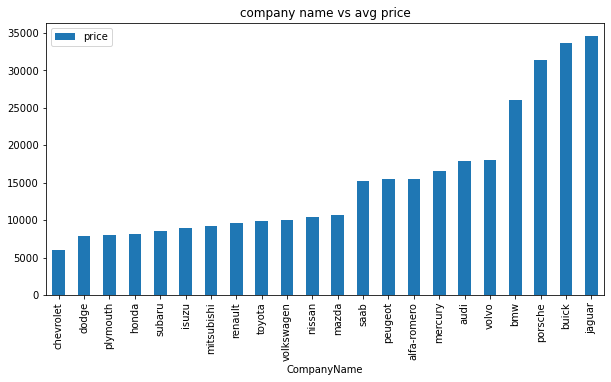

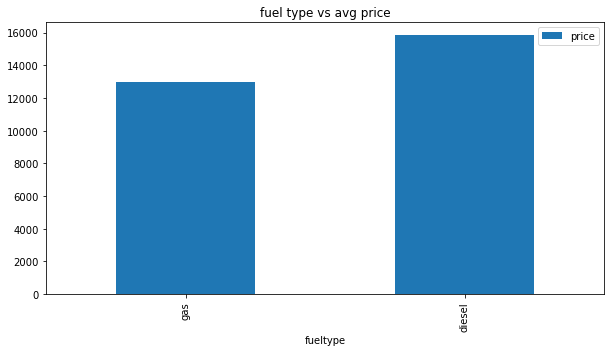

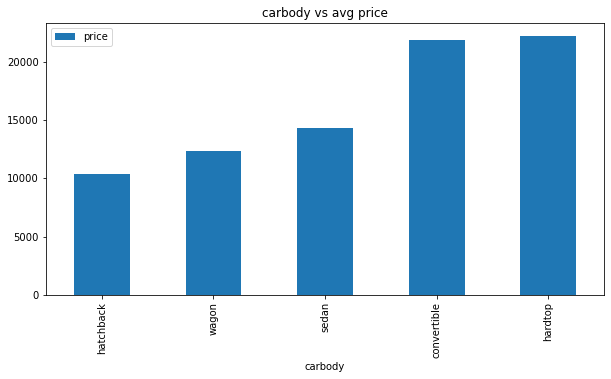

In [499]:
plt7=pd.DataFrame(data.groupby(["CompanyName"])["price"].mean().sort_values())
plt7
plt.figure(figsize=(20,6))
#plt.subplot(1,3,1)
plt7.plot.bar(figsize=(10,5))
plt.title("company name vs avg price")
plt.show()

plt8=pd.DataFrame(data.groupby(["fueltype"])["price"].mean().sort_values())
plt8
plt8.plot.bar(figsize=(10,5))
plt.title("fuel type vs avg price")
plt.show()


plt9=pd.DataFrame(data.groupby(['carbody'])["price"].mean().sort_values())
plt9
plt9.plot.bar(figsize=(10,5))
plt.title("carbody vs avg price")
plt.show()

# Inference for above
- buick and jaguar has high avg price
- diesel has avg price than gas
- convertible and hardtop has high avg price 

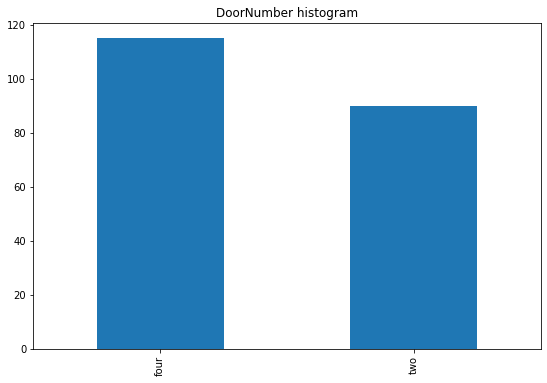

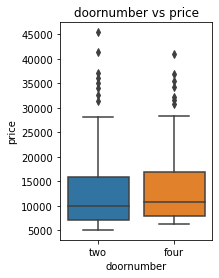

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


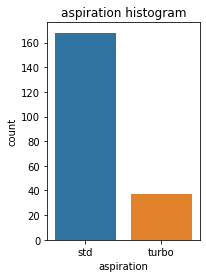

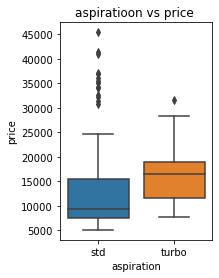

In [500]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title("DoorNumber histogram")
plt9=data.doornumber.value_counts().plot(kind="bar")    #sns.countplot(data.doornumber)  # same result
#sns.displot(plt9)
plt.show()
plt.subplot(1,2,2)
plt.title("doornumber vs price")
sns.boxplot(x=data.doornumber,y=data.price)
plt.show()

plt.subplot(1,2,1)
plt.title("aspiration histogram")
sns.countplot(data.aspiration)       # countplot is similar to value_counts function in pandas 
plt.show()

plt.subplot(1,2,2)
plt.title("aspiratioon vs price ")
sns.boxplot(x=data.aspiration,y=data.price)
plt.show()







# Inference for above
- door number variable is not effecting price much 
- aspriration for turbo has some price range than std

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


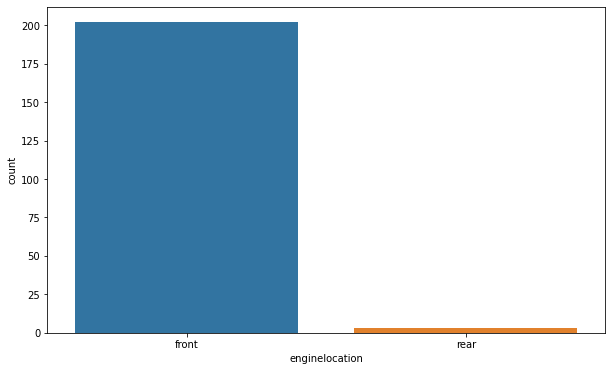

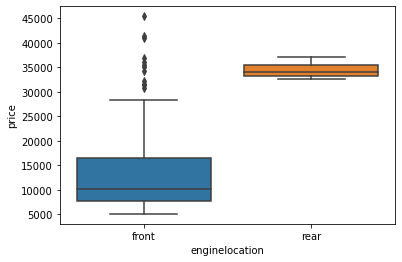

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


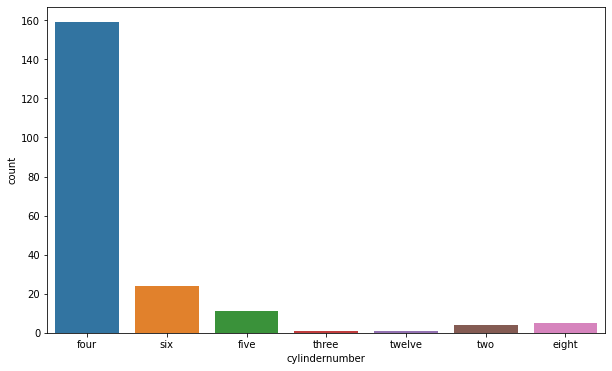

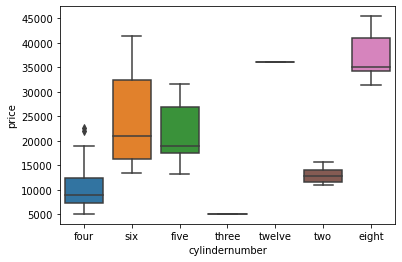

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


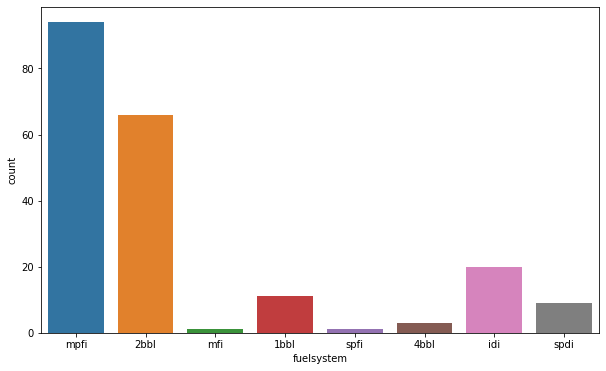

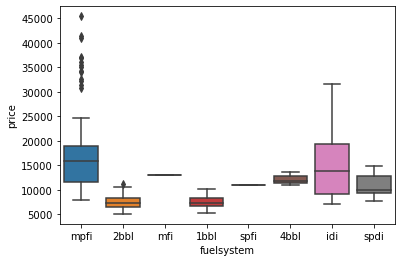

C:\Users\prasa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


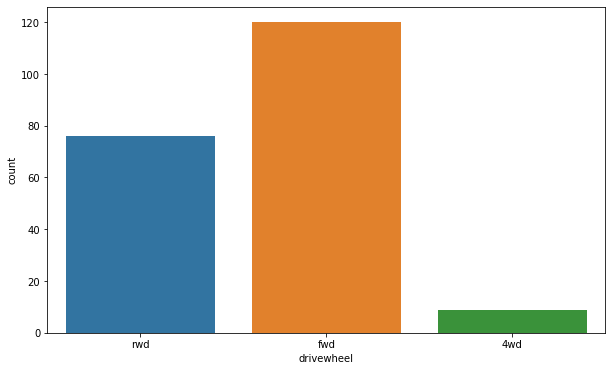

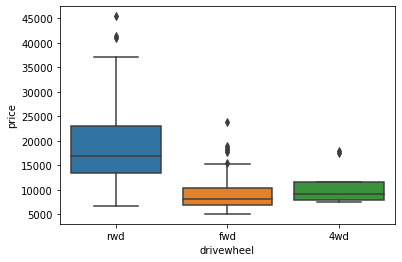

In [501]:
plt.figure(figsize=(10,6))
sns.countplot(data.enginelocation)
plt.show()
sns.boxplot(x=data.enginelocation,y=data.price)
plt.show()


plt.figure(figsize=(10,6))
sns.countplot(data.cylindernumber)
plt.show()
sns.boxplot(x=data.cylindernumber,y=data.price)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data.fuelsystem)
plt.show()
sns.boxplot(x=data.fuelsystem,y=data.price)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data.drivewheel)
plt.show()
sns.boxplot(x=data.drivewheel,y=data.price)
plt.show()

# Inference for above
- enginelocation variable rear has high price still used by very few.
- cylinder with 4 5 6 are common but the price for 8 cylinders cars is high
- mpfi and 2bbl  fuel system are most common type ...mpfi and idi having highest price range.
- fwd is preferred drive wheel but price is low for that..the price of rwd is  ery high compafred to fewd and 4wd


# Visualizing Numerical Data

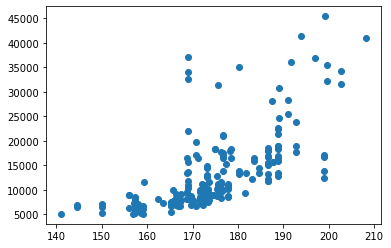

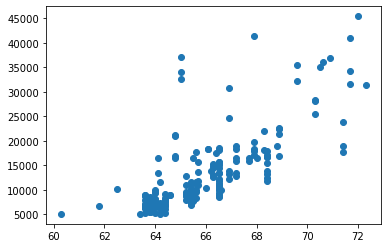

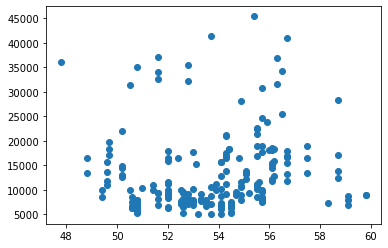

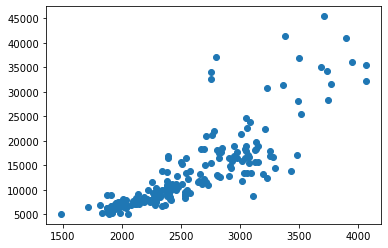

In [502]:
   # learn how to write code  to put xlabel ylabel by using a function
def plottingfn(i,j):
    #plt.xlabel()
    #plt.ylabel(j)
    plt.scatter(i,j)
    #plt.xlabel()
    plt.show()


plottingfn(data.carlength,data.price)
plottingfn(data.carwidth,data.price)
plottingfn(data.carheight,data.price)
plottingfn(data.curbweight,data.price)


#plt.figure(figsize=(10,6))
#plottingfn(data.carlength,data.price)
#plt.show()

#plt.scatter(x=data.carwidth,y=data.price)
#plt.show()

#plt.scatter(x=data.carheight,y=data.price)
#plt.show()

#plt.scatter(x=data.curbweight,y=data.price)
#plt.show()






# inference for above  
- cralength carwidth curbweight show positive correlation with price
- car height does not have positive correlation with price data points are randomly distributed.


3.3.2


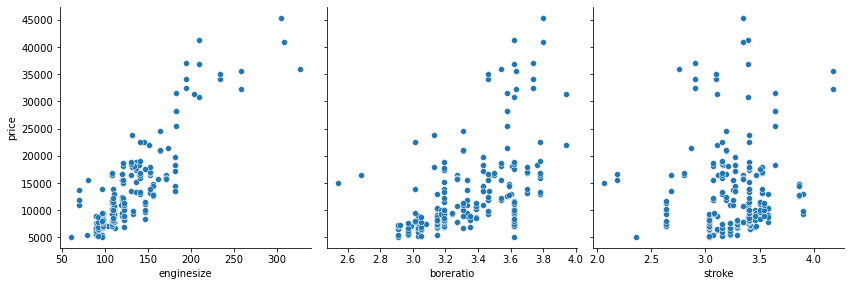

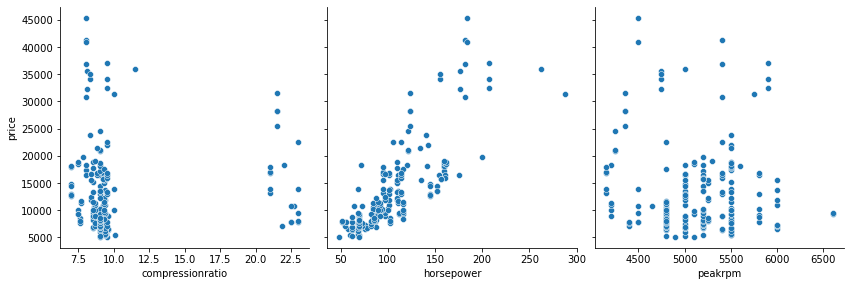

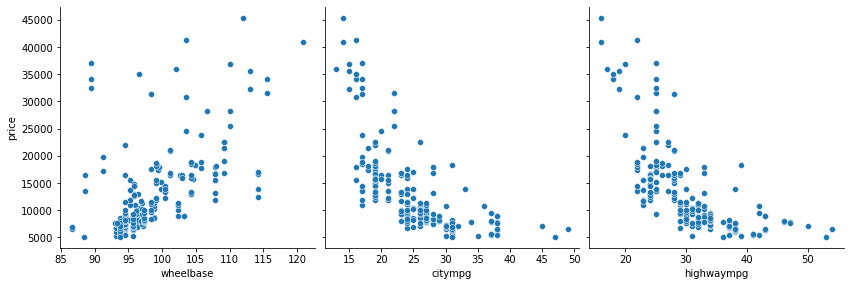

In [503]:
import matplotlib
print(matplotlib.__version__)
def pp(x,y,z):
    sns.pairplot(data,x_vars=[x,y,z],y_vars="price",height=4,aspect=1,kind="scatter",diag_kind=None)  #use diag_kind=none 
                                                        # otheerwise first plot in below pairplots will not plot
    plt.show()
    
pp("enginesize","boreratio","stroke")
pp("compressionratio","horsepower","peakrpm")
pp("wheelbase","citympg","highwaympg")



# Inference for above
- enginesize, boreratio, horsepower, wheel base are in positive correlation with  price
-  citympg and highwaympg are negative correlation with price


In [504]:
np.corrcoef(data.carlength,data.carwidth)   #correlation coefficient is used for deriving
                                          #the linear relationship b/w data points.

array([[1.        , 0.84111827],
       [0.84111827, 1.        ]])

# Deriving New features

In [505]:
# why we are not using for loop even thpugh it is printing for all the records in table..how?
data["Fueleconomy"]=0.55*data["citympg"]+0.45*data["highwaympg"]
data["Fueleconomy"]

0      23.70
1      23.70
2      22.15
3      26.70
4      19.80
       ...  
200    25.25
201    21.70
202    20.25
203    26.45
204    21.70
Name: Fueleconomy, Length: 205, dtype: float64

In [506]:
#Binning the car companies based on average price of each company
data["price"]=data["price"].astype('int64')
data['price']  # data.price


0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: int64

In [507]:
temp=data.copy()
print(temp)
table=(temp.groupby(["CompanyName"]))["price"].mean()
table

     car_ID  symboling  CompanyName fueltype aspiration doornumber  \
0         1          3  alfa-romero      gas        std        two   
1         2          3  alfa-romero      gas        std        two   
2         3          1  alfa-romero      gas        std        two   
3         4          2         audi      gas        std       four   
4         5          2         audi      gas        std       four   
..      ...        ...          ...      ...        ...        ...   
200     201         -1        volvo      gas        std       four   
201     202         -1        volvo      gas      turbo       four   
202     203         -1        volvo      gas        std       four   
203     204         -1        volvo   diesel      turbo       four   
204     205         -1        volvo      gas      turbo       four   

         carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0    convertible        rwd          front       88.6  ...        mpfi   
1    conver

CompanyName
alfa-romero    15498.333333
audi           17859.142857
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.250000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10415.666667
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.400000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

In [508]:
#for i in table:
 #   print(table[i])
""" if  table[i] > 0.0 and table[i] < 20000.0:
        data["carsrange"]='medium'
    elif table[i]>20000:
        data["carsrange"]='Highend'
data"""

' if  table[i] > 0.0 and table[i] < 20000.0:\n        data["carsrange"]=\'medium\'\n    elif table[i]>20000:\n        data["carsrange"]=\'Highend\'\ndata'

In [509]:
print (table.reset_index())
temp=temp.merge(table.reset_index(),how='left',on='CompanyName')   #left outer join  uses keys from left frame only
# on may be column or index level names to join on..   must be present in both dataframes. 
# suffoxes can be manually given not only _x and _y  we can give whatever names we want.

temp

    CompanyName         price
0   alfa-romero  15498.333333
1          audi  17859.142857
2           bmw  26118.750000
3         buick  33647.000000
4     chevrolet   6007.000000
5         dodge   7875.444444
6         honda   8184.692308
7         isuzu   8916.250000
8        jaguar  34600.000000
9         mazda  10652.882353
10      mercury  16503.000000
11   mitsubishi   9239.769231
12       nissan  10415.666667
13      peugeot  15489.090909
14     plymouth   7963.428571
15      porsche  31400.400000
16      renault   9595.000000
17         saab  15223.333333
18       subaru   8541.250000
19       toyota   9885.812500
20   volkswagen  10077.500000
21        volvo  18063.181818


,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price_x,Fueleconomy,price_y
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,15498.333333
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,15498.333333
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,15498.333333
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,17859.142857
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,17859.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,25.25,18063.181818
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,21.70,18063.181818
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,20.25,18063.181818
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470,26.45,18063.181818


In [510]:
bins=[0,10000,20000,40000]     # 0 to 10000 and 10000 to 20000 and 20000 to 40000
cars_bin=["budget","medium","highend"]  #bin labels must be one smaller than no.of bins.
data["Carsrange"]=pd.cut(temp['price_y'],bins,labels=cars_bin) # bin values into discrete intervals
# cut function is useful for converting continuos variable to a categorical variable.
data

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Fueleconomy,Carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,25.25,medium
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,21.70,medium
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,20.25,medium
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470,26.45,medium


# Bivariate Analysis


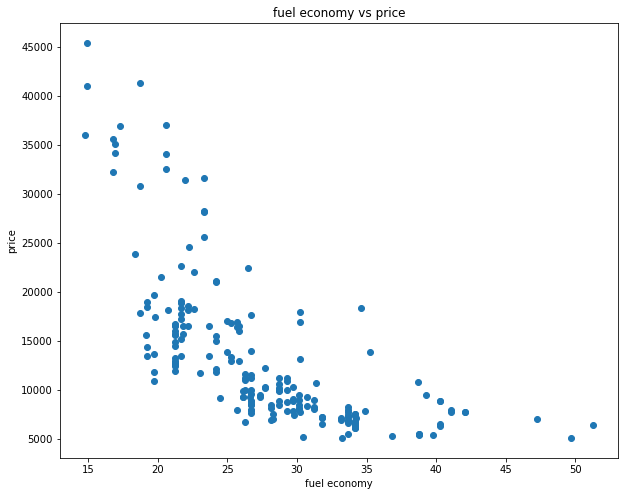

In [511]:
plt.figure(figsize=(10,8))
plt.title("fuel economy vs price")
plt.scatter(data['Fueleconomy'],data.price)

plt.xlabel("fuel economy")
plt.ylabel("price")
plt.show()


# Inference for above
Fuel economy and price are negatively correlated.

Carsrange                    budget        medium  highend
fuelsystem drivewheel                                     
1bbl       4wd                  NaN           NaN      NaN
           fwd          7555.545455           NaN      NaN
           rwd                  NaN           NaN      NaN
2bbl       4wd          8305.000000           NaN      NaN
           fwd          7126.000000   7870.904762      NaN
           rwd          7693.666667           NaN      NaN
4bbl       4wd                  NaN           NaN      NaN
           fwd                  NaN           NaN      NaN
           rwd                  NaN  12145.000000      NaN
idi        4wd                  NaN           NaN      NaN
           fwd          8794.666667   9500.666667      NaN
           rwd                  NaN  17114.142857  28394.0
mfi        4wd                  NaN           NaN      NaN
           fwd         12964.000000           NaN      NaN
           rwd                  NaN           NaN      N

<Figure size 720x576 with 0 Axes>

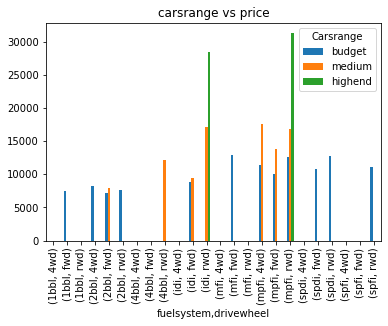

In [512]:
plt.figure(figsize=(10,8))

z=pd.DataFrame(data.groupby(["fuelsystem","drivewheel","Carsrange"])["price"].mean().unstack(fill_value=0))
print(z)

z.plot.bar()
plt.title("carsrange vs price")
plt.show()

#data.groupby(["Carsrange"])["price"].mean()

# Inference for above
highend cars uses rwd drive wheel and (idi and mpfi) as fuel system

# List of significant variabes after visula analysis
 - engine size
 - boreratio
 - horsepower
 - wheelbase
 - engine type  --  categorical
 - car body  --  categorical
 - fuel type  --  categorical
 - aspiration  --  categorical
 - #engine location 😊
 - cylinder number  --  categorical
 - #fuel system 😊
 - drive wheel  --  categorical
 - fuel economy
 - car range  --  categorical
 - car length
 - carwidth
 - curbweight
 - #citympg 😊
 - #highwaympg 😊  the above two are negatively correlated with price and did not consider.
 
 


In [513]:
data_lr=data[['price','fueltype','aspiration','carbody','drivewheel','wheelbase','curbweight','enginetype','cylindernumber',
              'enginesize','boreratio','horsepower','Fueleconomy','carlength','carwidth','Carsrange']]
data_lr

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,Fueleconomy,carlength,carwidth,Carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,gas,std,sedan,rwd,109.1,2952,ohc,four,141,3.78,114,25.25,188.8,68.9,medium
201,19045,gas,turbo,sedan,rwd,109.1,3049,ohc,four,141,3.78,160,21.70,188.8,68.8,medium
202,21485,gas,std,sedan,rwd,109.1,3012,ohcv,six,173,3.58,134,20.25,188.8,68.9,medium
203,22470,diesel,turbo,sedan,rwd,109.1,3217,ohc,six,145,3.01,106,26.45,188.8,68.9,medium


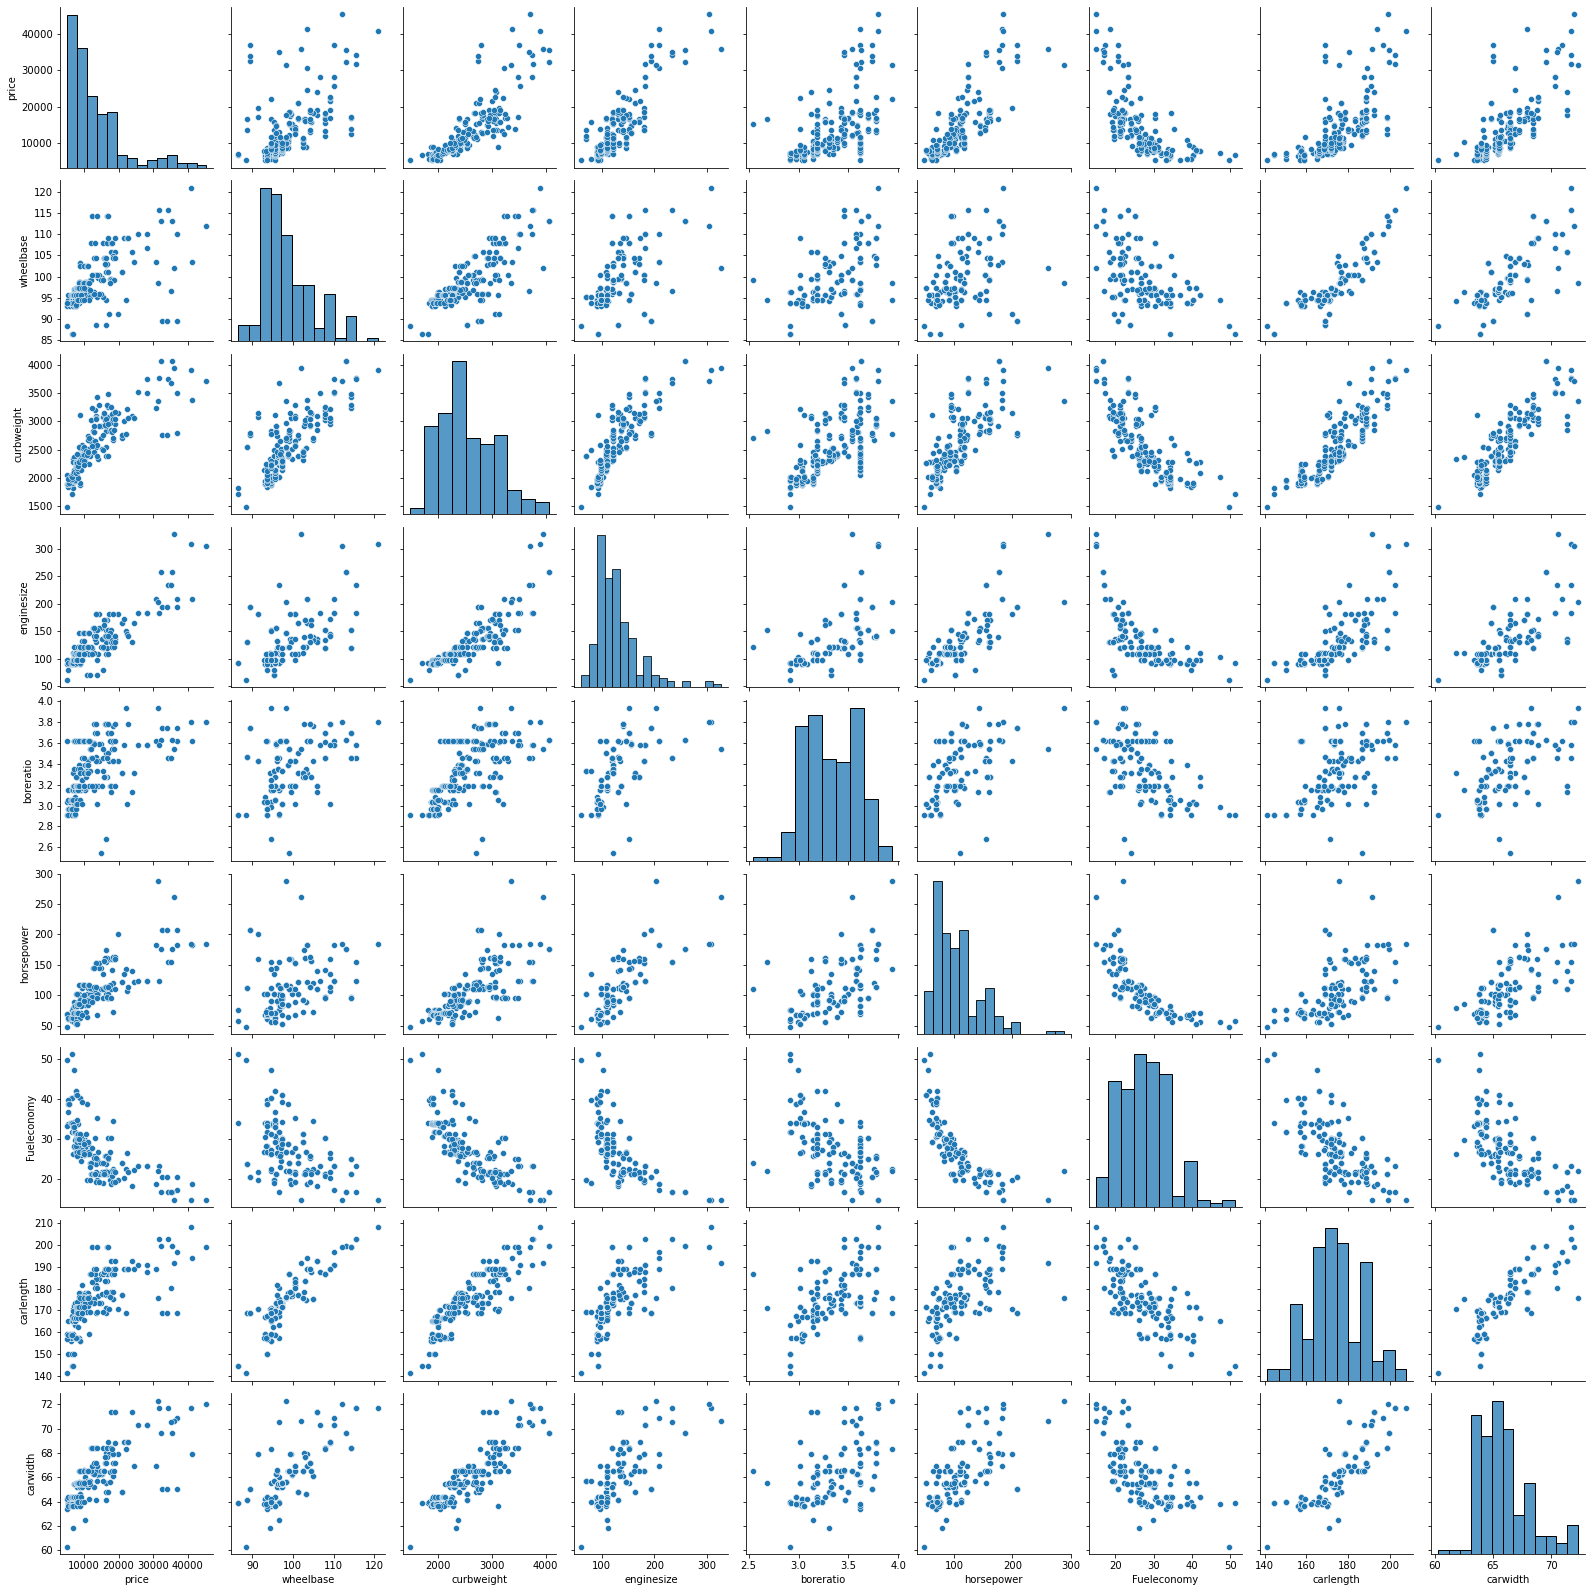

In [514]:
sns.pairplot(data_lr)   # seaborn will show only numeric values
plt.show()

# Dummy variables
 -  for categorical variables, we need to create dummy variables
 

In [515]:
def dummies(x,y):
    temp=pd.get_dummies(y[x],drop_first=True)
    y=pd.concat([y,temp],axis=1)
    y.drop([x],axis=1,inplace=True)
    return y
    
    
    
"""temp=pd.get_dummies(data_lr['fueltype'],drop_first=True) #drop_first bool, default False
# to get k-1 dummies out of k categorical levels by removing the first level
temp   #if drop_firts is TRue , first column is dropped.  for k variables, we get k-1 dummy variables
df=pd.concat([data_lr,temp],axis=1) # axis =1 means concatenate along columns, and 0 means concatenate along rows
print(df)
df.drop('fueltype',axis=1,inplace=True) #  if axis is not menetioned i.e default =0(along rows)
#then it will raise error because fueltypeis not found in rows and inplace must be TRue tehn only fueltype column will be removed 
df"""


data_lr=dummies('fueltype',data_lr)
data_lr=dummies('aspiration',data_lr)
data_lr=dummies('carbody',data_lr)
data_lr=dummies('drivewheel',data_lr)
data_lr=dummies('enginetype',data_lr)
data_lr=dummies("cylindernumber",data_lr)
data_lr=dummies("Carsrange",data_lr)

data_lr




,price,wheelbase,curbweight,enginesize,boreratio,horsepower,Fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,medium,highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1,2952,141,3.78,114,25.25,188.8,68.9,1,...,0,0,0,1,0,0,0,0,1,0
201,19045,109.1,3049,141,3.78,160,21.70,188.8,68.8,1,...,0,0,0,1,0,0,0,0,1,0
202,21485,109.1,3012,173,3.58,134,20.25,188.8,68.9,1,...,1,0,0,0,1,0,0,0,1,0
203,22470,109.1,3217,145,3.01,106,26.45,188.8,68.9,0,...,0,0,0,0,1,0,0,0,1,0


# Train Test split and scaling


In [516]:
from sklearn.model_selection import train_test_split
np.random.seed(0)   # same output for each time.
df_train,df_test=train_test_split(data_lr,train_size=0.7,test_size=0.3,random_state=100)   #if random_state is not given i.e None 
#then everytime(for each execution) different values for train and test sets 
# if random_state = any integer  then the the order/list of values in test and train sets is fixed for that random state value
# if random_state=0  one order is fixed even if we execute multiple times
#  if random_state=1  different order from above will be produced
# if random state= 2,3,4,......different orders for each integers and the order is fixed for a particular intreger value if we run multiple times
print(df_train,df_test)

     price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
122   7609       93.7        2191          98       2.97          68   
125  22018       94.5        2778         151       3.94         143   
166   9538       94.5        2300          98       3.24         112   
1    16500       88.6        2548         130       3.47         111   
199  18950      104.3        3157         130       3.62         162   
..     ...        ...         ...         ...        ...         ...   
87    9279       96.3        2403         110       3.17         116   
103  13499      100.4        3060         181       3.43         152   
67   25552      110.0        3515         183       3.58         123   
24    6229       93.7        1967          90       2.97          68   
8    23875      105.8        3086         131       3.13         140   

     Fueleconomy  carlength  carwidth  gas  ...  ohcv  rotor  five  four  six  \
122        34.15      167.3      63.8    1  ...     0 

In [517]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler)
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','Fueleconomy','carlength','carwidth','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train


MinMaxScaler()


<ipython-input-517-43284997117e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
C:\Users\prasa\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,Fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,medium,highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.114954,0.334483,0.354926,0.184906,0.388889,0.283333,0.311385,0.508943,0.425000,1,...,0,0,0,1,0,0,0,0,0,0
103,0.231539,0.475862,0.609775,0.452830,0.595238,0.433333,0.189300,0.707317,0.516667,1,...,1,0,0,0,1,0,0,0,1,0
67,0.564522,0.806897,0.786268,0.460377,0.714286,0.312500,0.234568,0.809756,0.833333,0,...,0,0,1,0,0,0,0,0,0,1
24,0.030693,0.244828,0.185803,0.109434,0.230159,0.083333,0.530864,0.263415,0.291667,1,...,0,0,0,1,0,0,0,0,0,0


In [518]:
df_train.describe()  # we can use percentiles and include parameter for all rows and few rows

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,Fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,medium,highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

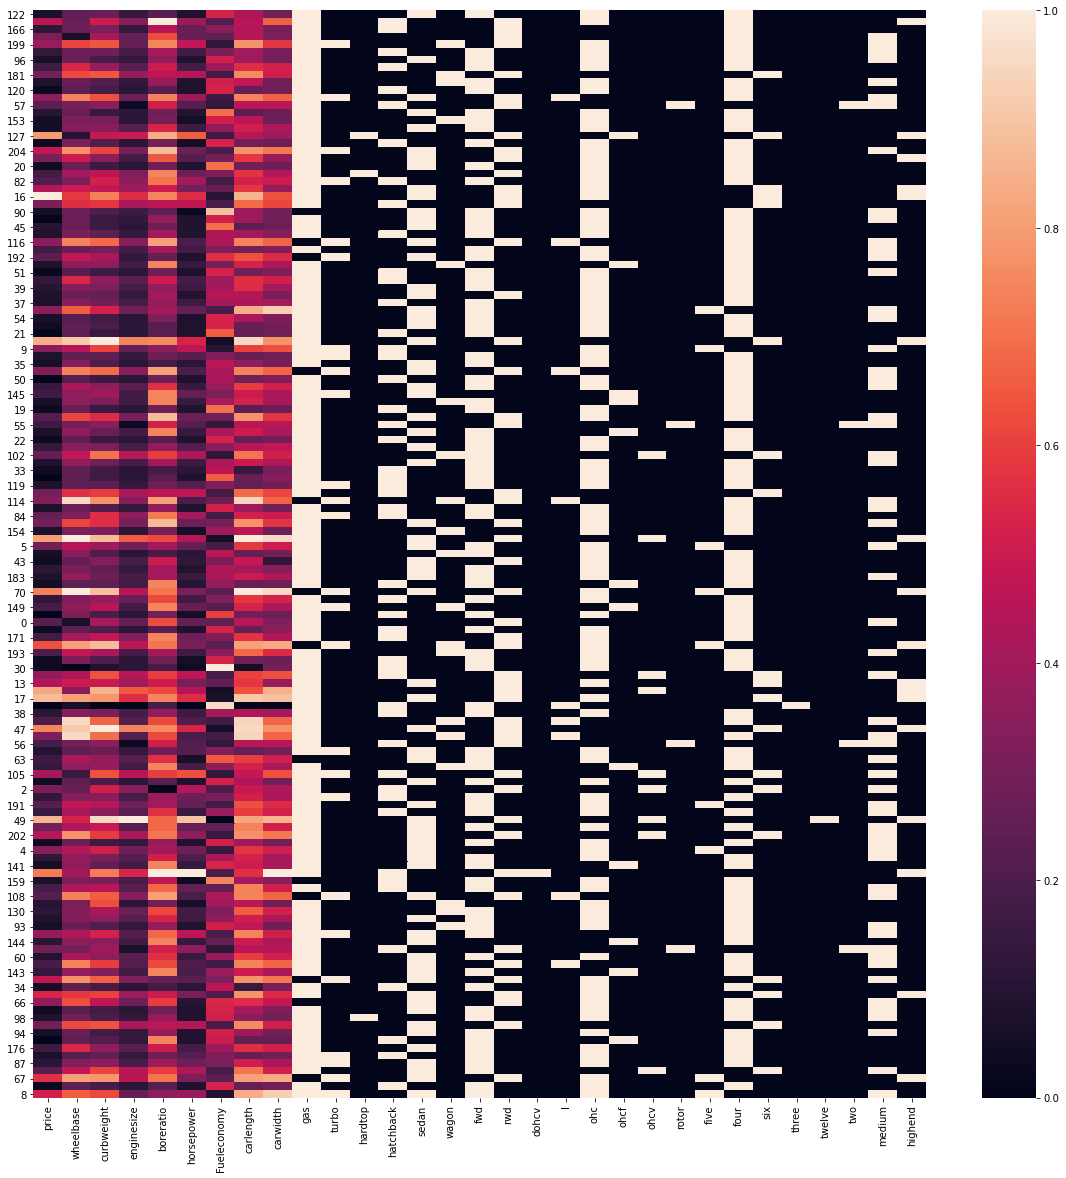

In [519]:
# correlation using heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_train)

<AxesSubplot:>

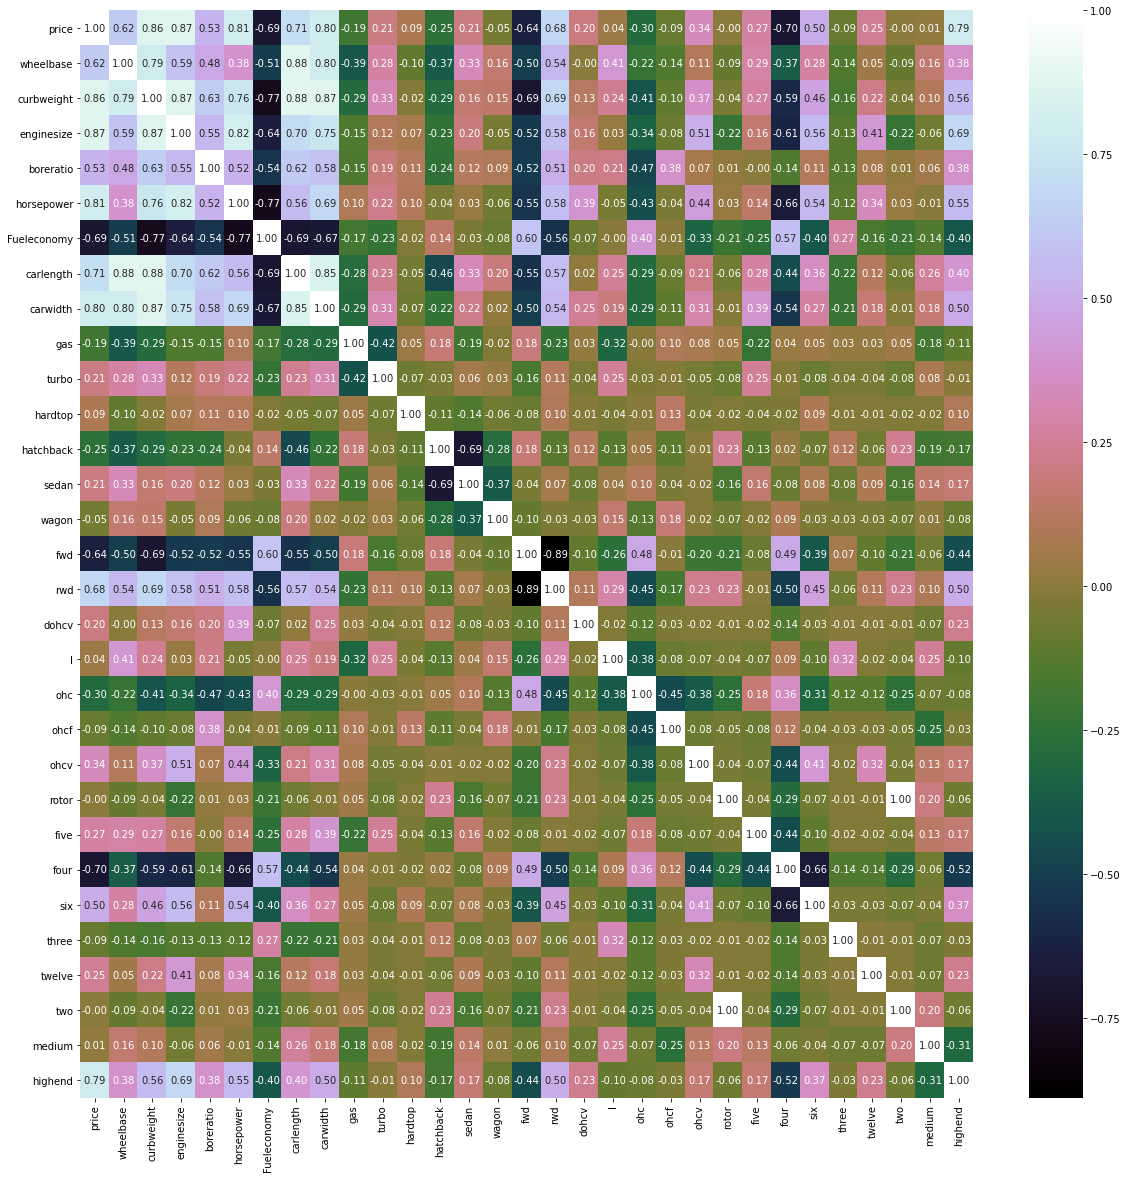

In [520]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(),annot=True,cmap='cubehelix',fmt='0.2f')  # annot=true fills the box with corelation value and
#fmt=0.2 means upto 2 decimal points 

In [521]:
# divide the data into x and y labels
y_train=df_train.pop("price")
X_train=df_train
print(y_train)  # if we run the cell again , we will get key error saying price is not found because price is already popped out from df_train when we run it for the first time.
#so second time when we run, there is no price attribute in df_train..... for that we need to run all cells once agin
#x_train

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
         ...   
87     0.114954
103    0.231539
67     0.564522
24     0.030693
8      0.518192
Name: price, Length: 143, dtype: float64


In [522]:
X_train

,wheelbase,curbweight,enginesize,boreratio,horsepower,Fueleconomy,carlength,carwidth,gas,turbo,...,ohcv,rotor,five,four,six,three,twelve,two,medium,highend
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,...,0,0,0,1,0,0,0,0,0,0
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,...,0,0,0,1,0,0,0,0,0,1
166,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,...,0,0,0,1,0,0,0,0,0,0
1,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,...,0,0,0,1,0,0,0,0,1,0
199,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.334483,0.354926,0.184906,0.388889,0.283333,0.311385,0.508943,0.425000,1,1,...,0,0,0,1,0,0,0,0,0,0
103,0.475862,0.609775,0.452830,0.595238,0.433333,0.189300,0.707317,0.516667,1,0,...,1,0,0,0,1,0,0,0,1,0
67,0.806897,0.786268,0.460377,0.714286,0.312500,0.234568,0.809756,0.833333,0,1,...,0,0,1,0,0,0,0,0,0,1
24,0.244828,0.185803,0.109434,0.230159,0.083333,0.530864,0.263415,0.291667,1,0,...,0,0,0,1,0,0,0,0,0,0


# Model Building


In [523]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm=LinearRegression()
a=lm.fit(X_train,y_train)
print(a)
print(a.coef_) # weight vector of shape(no.of targets, no.of features)=(1,30)   e here is 10 
print(a.intercept_)  #-0.006477981385304865   is bias
rfe = RFE(a, n_features_to_select=10)
print(rfe)
rfe.fit(X_train,y_train)
print(rfe)
print(rfe.support_)  # returns True for all selected variables and fase for not slected variables
rfe.ranking_  # returns rank 1 for all features which are true and 

# I did not understand what fetaures it selected


LinearRegression()
[ 1.09917927e-01  2.85740288e-01  4.51228270e-02 -1.05074895e-01
  6.06995546e-01  1.33917883e-01 -5.67971232e-02  2.08057088e-01
 -2.03824004e-02 -9.71999748e-03 -9.93611025e-02 -1.38807926e-01
 -1.20879861e-01 -1.40201624e-01 -1.80914517e-02  1.49433054e-02
 -3.30602132e-01 -2.94962337e-03  7.55115587e-02  1.16000104e-01
 -4.26281995e-02 -2.13041170e-04 -1.23643802e-01 -1.04593989e-01
 -8.27321584e-02  7.17557484e-02 -1.75216607e-01 -2.13041170e-04
  4.54977781e-02  2.26058650e-01]
-0.006477981385304865
RFE(estimator=LinearRegression(), n_features_to_select=10)
RFE(estimator=LinearRegression(), n_features_to_select=10)
[False  True False False  True  True False  True False False False  True
  True  True False False  True False False False False False False False
 False False  True False False  True]


array([ 3,  1, 13, 10,  1,  1, 11,  1, 17, 18,  2,  1,  1,  1, 16, 15,  1,
       19,  7,  8,  9, 21,  6,  4,  5, 14,  1, 20, 12,  1])

In [524]:
a=list(zip(X_train.columns, rfe.support_,rfe.ranking_))  
(a)

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('Fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('medium', False, 12),
 ('highend', True, 1)]

In [525]:
print(X_train.columns[rfe.ranking_])
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe


Index(['boreratio', 'curbweight', 'wagon', 'hardtop', 'curbweight',
       'curbweight', 'hatchback', 'curbweight', 'l', 'ohc', 'enginesize',
       'curbweight', 'curbweight', 'curbweight', 'dohcv', 'rwd', 'curbweight',
       'ohcf', 'carwidth', 'gas', 'turbo', 'rotor', 'carlength', 'horsepower',
       'Fueleconomy', 'fwd', 'curbweight', 'ohcv', 'sedan', 'curbweight'],
      dtype='object')


,curbweight,horsepower,Fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
87,0.354926,0.283333,0.311385,0.425000,0,1,0,0,0,0
103,0.609775,0.433333,0.189300,0.516667,0,1,0,0,0,0
67,0.786268,0.312500,0.234568,0.833333,0,1,0,0,0,1
24,0.185803,0.083333,0.530864,0.291667,1,0,0,0,0,0


# building model using stats model  for the detailed statistics

In [526]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor    #https://www.statsmodels.org/stable/api.html


In [527]:
def build_model(X,y):
    X=sm.add_constant(X)
    print(X)
    lm=sm.OLS(y,X)
    a=lm.fit()
    print(a.params)   # constant is bias term and remaining are weights for each feature
    print(a.summary())
    return X
X_train_new=build_model(X_train_rfe,y_train)
print(X_train_new)



     const  curbweight  horsepower  Fueleconomy  carwidth  hatchback  sedan  \
122    1.0    0.272692    0.083333     0.530864  0.291667          0      1   
125    1.0    0.500388    0.395833     0.213992  0.666667          1      0   
166    1.0    0.314973    0.266667     0.344307  0.308333          1      0   
1      1.0    0.411171    0.262500     0.244170  0.316667          0      0   
199    1.0    0.647401    0.475000     0.122085  0.575000          0      0   
..     ...         ...         ...          ...       ...        ...    ...   
87     1.0    0.354926    0.283333     0.311385  0.425000          0      1   
103    1.0    0.609775    0.433333     0.189300  0.516667          0      1   
67     1.0    0.786268    0.312500     0.234568  0.833333          0      1   
24     1.0    0.185803    0.083333     0.530864  0.291667          1      0   
8      1.0    0.619860    0.383333     0.097394  0.925000          0      1   

     wagon  dohcv  twelve  highend  
122      0    

# Inference for above
- as p value > 0.05, then there is strong veidence for null hypothesis . so we will not consider those variable whose p >0.0.5
- twelve and fuel economy has p >0.05 , so drop those two independent variables

In [528]:
X_train_new=X_train_new.drop(columns=["Fueleconomy","twelve"])
X_train_new


,const,curbweight,horsepower,carwidth,hatchback,sedan,wagon,dohcv,highend
122,1.0,0.272692,0.083333,0.291667,0,1,0,0,0
125,1.0,0.500388,0.395833,0.666667,1,0,0,0,1
166,1.0,0.314973,0.266667,0.308333,1,0,0,0,0
1,1.0,0.411171,0.262500,0.316667,0,0,0,0,0
199,1.0,0.647401,0.475000,0.575000,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
87,1.0,0.354926,0.283333,0.425000,0,1,0,0,0
103,1.0,0.609775,0.433333,0.516667,0,1,0,0,0
67,1.0,0.786268,0.312500,0.833333,0,1,0,0,1
24,1.0,0.185803,0.083333,0.291667,1,0,0,0,0


In [529]:
X_train_new=build_model(X_train_new,y_train)

     const  curbweight  horsepower  carwidth  hatchback  sedan  wagon  dohcv  \
122    1.0    0.272692    0.083333  0.291667          0      1      0      0   
125    1.0    0.500388    0.395833  0.666667          1      0      0      0   
166    1.0    0.314973    0.266667  0.308333          1      0      0      0   
1      1.0    0.411171    0.262500  0.316667          0      0      0      0   
199    1.0    0.647401    0.475000  0.575000          0      0      1      0   
..     ...         ...         ...       ...        ...    ...    ...    ...   
87     1.0    0.354926    0.283333  0.425000          0      1      0      0   
103    1.0    0.609775    0.433333  0.516667          0      1      0      0   
67     1.0    0.786268    0.312500  0.833333          0      1      0      0   
24     1.0    0.185803    0.083333  0.291667          1      0      0      0   
8      1.0    0.619860    0.383333  0.925000          0      1      0      0   

     highend  
122        0  
125      

In [530]:
# VIF detects multicollinerairty in regression analysis
# here multicollinearoty refers to correlation b/w independent variables in data  which affect the regression results
def Detect_Multicollinearity(X):
    vif=pd.DataFrame()
    vif['features']=X.columns
    print(X.columns,vif['features'])
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(0,X.shape[1])]  
    vif['VIF']=round(vif['VIF'],3)# upto 3 decimal points
    vif=vif.sort_values(['VIF'],ascending=[False])
    return vif
Detect_Multicollinearity(X_train_new)



Index(['const', 'curbweight', 'horsepower', 'carwidth', 'hatchback', 'sedan',
       'wagon', 'dohcv', 'highend'],
      dtype='object') 0         const
1    curbweight
2    horsepower
3      carwidth
4     hatchback
5         sedan
6         wagon
7         dohcv
8       highend
Name: features, dtype: object


,features,VIF
0,const,26.897
1,curbweight,8.104
5,sedan,6.073
4,hatchback,5.630
3,carwidth,5.136
2,horsepower,3.605
6,wagon,3.575
8,highend,1.634
7,dohcv,1.458


In [531]:
Detect_Multicollinearity(X_train_new)
X_train_new=X_train_new.drop(columns=['curbweight'])  # dropping curb weight because of high vif 
X_train_new

Index(['const', 'curbweight', 'horsepower', 'carwidth', 'hatchback', 'sedan',
       'wagon', 'dohcv', 'highend'],
      dtype='object') 0         const
1    curbweight
2    horsepower
3      carwidth
4     hatchback
5         sedan
6         wagon
7         dohcv
8       highend
Name: features, dtype: object


,const,horsepower,carwidth,hatchback,sedan,wagon,dohcv,highend
122,1.0,0.083333,0.291667,0,1,0,0,0
125,1.0,0.395833,0.666667,1,0,0,0,1
166,1.0,0.266667,0.308333,1,0,0,0,0
1,1.0,0.262500,0.316667,0,0,0,0,0
199,1.0,0.475000,0.575000,0,0,1,0,0
...,...,...,...,...,...,...,...,...
87,1.0,0.283333,0.425000,0,1,0,0,0
103,1.0,0.433333,0.516667,0,1,0,0,0
67,1.0,0.312500,0.833333,0,1,0,0,1
24,1.0,0.083333,0.291667,1,0,0,0,0


In [532]:
X_train_new=build_model(X_train_new,y_train)

     const  horsepower  carwidth  hatchback  sedan  wagon  dohcv  highend
122    1.0    0.083333  0.291667          0      1      0      0        0
125    1.0    0.395833  0.666667          1      0      0      0        1
166    1.0    0.266667  0.308333          1      0      0      0        0
1      1.0    0.262500  0.316667          0      0      0      0        0
199    1.0    0.475000  0.575000          0      0      1      0        0
..     ...         ...       ...        ...    ...    ...    ...      ...
87     1.0    0.283333  0.425000          0      1      0      0        0
103    1.0    0.433333  0.516667          0      1      0      0        0
67     1.0    0.312500  0.833333          0      1      0      0        1
24     1.0    0.083333  0.291667          1      0      0      0        0
8      1.0    0.383333  0.925000          0      1      0      0        0

[143 rows x 8 columns]
const        -0.031901
horsepower    0.468956
carwidth      0.426864
hatchback    -0.104

In [533]:
Detect_Multicollinearity(X_train_new)

Index(['const', 'horsepower', 'carwidth', 'hatchback', 'sedan', 'wagon',
       'dohcv', 'highend'],
      dtype='object') 0         const
1    horsepower
2      carwidth
3     hatchback
4         sedan
5         wagon
6         dohcv
7       highend
Name: features, dtype: object


,features,VIF
0,const,26.891
4,sedan,6.059
3,hatchback,5.539
5,wagon,3.471
1,horsepower,2.504
2,carwidth,2.220
7,highend,1.560
6,dohcv,1.214


In [534]:
# Drop sedan becuase of high vif value
X_train_new=X_train_new.drop('sedan', axis=1)
X_train_new


,const,horsepower,carwidth,hatchback,wagon,dohcv,highend
122,1.0,0.083333,0.291667,0,0,0,0
125,1.0,0.395833,0.666667,1,0,0,1
166,1.0,0.266667,0.308333,1,0,0,0
1,1.0,0.262500,0.316667,0,0,0,0
199,1.0,0.475000,0.575000,0,1,0,0
...,...,...,...,...,...,...,...
87,1.0,0.283333,0.425000,0,0,0,0
103,1.0,0.433333,0.516667,0,0,0,0
67,1.0,0.312500,0.833333,0,0,0,1
24,1.0,0.083333,0.291667,1,0,0,0


In [535]:
Detect_Multicollinearity(X_train_new)

Index(['const', 'horsepower', 'carwidth', 'hatchback', 'wagon', 'dohcv',
       'highend'],
      dtype='object') 0         const
1    horsepower
2      carwidth
3     hatchback
4         wagon
5         dohcv
6       highend
Name: features, dtype: object


,features,VIF
0,const,10.823
1,horsepower,2.392
2,carwidth,2.086
6,highend,1.554
3,hatchback,1.231
5,dohcv,1.211
4,wagon,1.110


In [536]:
X_train_new=build_model(X_train_new,y_train)

     const  horsepower  carwidth  hatchback  wagon  dohcv  highend
122    1.0    0.083333  0.291667          0      0      0        0
125    1.0    0.395833  0.666667          1      0      0        1
166    1.0    0.266667  0.308333          1      0      0        0
1      1.0    0.262500  0.316667          0      0      0        0
199    1.0    0.475000  0.575000          0      1      0        0
..     ...         ...       ...        ...    ...    ...      ...
87     1.0    0.283333  0.425000          0      0      0        0
103    1.0    0.433333  0.516667          0      0      0        0
67     1.0    0.312500  0.833333          0      0      0        1
24     1.0    0.083333  0.291667          1      0      0        0
8      1.0    0.383333  0.925000          0      0      0        0

[143 rows x 7 columns]
const        -0.093391
horsepower    0.500066
carwidth      0.396303
hatchback    -0.037347
wagon        -0.017022
dohcv        -0.320316
highend       0.280767
dtype: floa

In [537]:
#drop wagon because of high p value   >>> 0.05
X_train_new=X_train_new.drop(columns=['wagon'])
X_train_new

,const,horsepower,carwidth,hatchback,dohcv,highend
122,1.0,0.083333,0.291667,0,0,0
125,1.0,0.395833,0.666667,1,0,1
166,1.0,0.266667,0.308333,1,0,0
1,1.0,0.262500,0.316667,0,0,0
199,1.0,0.475000,0.575000,0,0,0
...,...,...,...,...,...,...
87,1.0,0.283333,0.425000,0,0,0
103,1.0,0.433333,0.516667,0,0,0
67,1.0,0.312500,0.833333,0,0,1
24,1.0,0.083333,0.291667,1,0,0


In [538]:
Detect_Multicollinearity(X_train_new)

Index(['const', 'horsepower', 'carwidth', 'hatchback', 'dohcv', 'highend'], dtype='object') 0         const
1    horsepower
2      carwidth
3     hatchback
4         dohcv
5       highend
Name: features, dtype: object


,features,VIF
0,const,10.394
1,horsepower,2.390
2,carwidth,2.085
5,highend,1.532
4,dohcv,1.209
3,hatchback,1.127


# Residual analysis of Model

In [539]:
lm=sm.OLS(y_train,X_train_new).fit()
print(lm)
y_train_price=lm.predict(X_train_new)
print(y_train_price)



122    0.060063
125    0.614558
166    0.124929
1      0.159767
199    0.368396
         ...   
87     0.213025
103    0.324453
67     0.672279
24     0.026428
8      0.460757
Length: 143, dtype: float64


C:\Users\prasa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


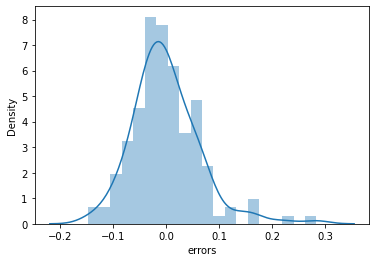

In [540]:
plt.figure()
#print(y_train-y_train_price)
sns.distplot((y_train-y_train_price),bins=20)  #20 equal intervals
plt.xlabel('errors')
plt.show()

In [541]:
# errors are normally distributed and the assumption of linear modelling seems to be fulfilled


# Prediction and Evaluation


In [542]:
print(df_test)

     price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
160   7738       95.7        2094          98       3.19          70   
186   8495       97.3        2275         109       3.19          85   
59    8845       98.8        2385         122       3.39          84   
165   9298       94.5        2265          98       3.24         112   
140   7603       93.3        2240         108       3.62          73   
..     ...        ...         ...         ...        ...         ...   
28    8921      103.3        2535         122       3.34          88   
29   12964       95.9        2811         156       3.60         145   
182   7775       97.3        2261          97       3.01          52   
40   10295       96.5        2372         110       3.15          86   
128  37028       89.5        2800         194       3.74         207   

     Fueleconomy  carlength  carwidth  gas  ...  ohcv  rotor  five  four  six  \
160        42.05      166.3      64.4    1  ...     0 

In [543]:
X_train_new

,const,horsepower,carwidth,hatchback,dohcv,highend
122,1.0,0.083333,0.291667,0,0,0
125,1.0,0.395833,0.666667,1,0,1
166,1.0,0.266667,0.308333,1,0,0
1,1.0,0.262500,0.316667,0,0,0
199,1.0,0.475000,0.575000,0,0,0
...,...,...,...,...,...,...
87,1.0,0.283333,0.425000,0,0,0
103,1.0,0.433333,0.516667,0,0,0
67,1.0,0.312500,0.833333,0,0,1
24,1.0,0.083333,0.291667,1,0,0


In [544]:
#X_train_new=X_train_new.drop(columns=['const'])
#X_train_new

#df_test=scaler.fit_transform(df_test)
#df_test


In [545]:
#X_test=df_test[X_train_new(columns=['horsepower','carwidth','hatchback','dohcv','highend'])]
#print(X_test)
#X_test_new=scaler.fit_transform(X_test)#(columns=['horsepower','carwidth','hatchback','dohcv','highend']))
#X_test_new

num_vars=['horsepower','carwidth','hatchback','dohcv','highend','price']
df_test[num_vars]=scaler.fit_transform(df_test[num_vars])
df_test


<ipython-input-545-cd2a31e1d6bd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars]=scaler.fit_transform(df_test[num_vars])
C:\Users\prasa\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,price,wheelbase,curbweight,enginesize,boreratio,horsepower,Fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,medium,highend
160,0.058474,95.7,2094,98,3.19,0.116129,42.05,166.3,0.200000,1,...,0,0,0,1,0,0,0,0,0,0.0
186,0.077398,97.3,2275,109,3.19,0.212903,30.15,171.7,0.315789,1,...,0,0,0,1,0,0,0,0,1,0.0
59,0.086148,98.8,2385,122,3.39,0.206452,28.70,177.8,0.421053,1,...,0,0,0,1,0,0,0,0,1,0.0
165,0.097473,94.5,2265,98,3.24,0.387097,27.35,168.7,0.157895,1,...,0,0,0,1,0,0,0,0,0,0.0
140,0.055099,93.3,2240,108,3.62,0.135484,28.25,157.3,0.136842,1,...,0,0,0,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.088048,103.3,2535,122,3.34,0.232258,26.70,174.6,0.221053,1,...,0,0,0,1,0,0,0,0,0,0.0
29,0.189120,95.9,2811,156,3.60,0.600000,21.25,173.2,0.400000,1,...,0,0,0,1,0,0,0,0,0,0.0
182,0.059399,97.3,2261,97,3.01,0.000000,41.05,171.7,0.315789,0,...,0,0,0,1,0,0,0,0,1,0.0
40,0.122397,96.5,2372,110,3.15,0.219355,29.70,175.4,0.000000,1,...,0,0,0,1,0,0,0,0,0,0.0


In [546]:
y_test=df_test.pop('price')
print(y_test)


160    0.058474
186    0.077398
59     0.086148
165    0.097473
140    0.055099
         ...   
28     0.088048
29     0.189120
182    0.059399
40     0.122397
128    0.790705
Name: price, Length: 62, dtype: float64


In [547]:
#X_test_new=scaler.fit_transform(X_test)
#print(X_test_new)

X_test=df_test
print(X_test)

     wheelbase  curbweight  enginesize  boreratio  horsepower  Fueleconomy  \
160       95.7        2094          98       3.19    0.116129        42.05   
186       97.3        2275         109       3.19    0.212903        30.15   
59        98.8        2385         122       3.39    0.206452        28.70   
165       94.5        2265          98       3.24    0.387097        27.35   
140       93.3        2240         108       3.62    0.135484        28.25   
..         ...         ...         ...        ...         ...          ...   
28       103.3        2535         122       3.34    0.232258        26.70   
29        95.9        2811         156       3.60    0.600000        21.25   
182       97.3        2261          97       3.01    0.000000        41.05   
40        96.5        2372         110       3.15    0.219355        29.70   
128       89.5        2800         194       3.74    1.000000        20.60   

     carlength  carwidth  gas  turbo  ...  ohcv  rotor  five  f

In [548]:
X_train_new=X_train_new.drop("const",axis=1)    #  (columns=['const'])
X_train_new

,horsepower,carwidth,hatchback,dohcv,highend
122,0.083333,0.291667,0,0,0
125,0.395833,0.666667,1,0,1
166,0.266667,0.308333,1,0,0
1,0.262500,0.316667,0,0,0
199,0.475000,0.575000,0,0,0
...,...,...,...,...,...
87,0.283333,0.425000,0,0,0
103,0.433333,0.516667,0,0,0
67,0.312500,0.833333,0,0,1
24,0.083333,0.291667,1,0,0


In [549]:
X_test_new=X_test[X_train_new.columns]
X_test_new


,horsepower,carwidth,hatchback,dohcv,highend
160,0.116129,0.200000,0.0,0.0,0.0
186,0.212903,0.315789,0.0,0.0,0.0
59,0.206452,0.421053,1.0,0.0,0.0
165,0.387097,0.157895,0.0,0.0,0.0
140,0.135484,0.136842,1.0,0.0,0.0
...,...,...,...,...,...
28,0.232258,0.221053,0.0,0.0,0.0
29,0.600000,0.400000,1.0,0.0,0.0
182,0.000000,0.315789,0.0,0.0,0.0
40,0.219355,0.000000,0.0,0.0,0.0


In [550]:
X_test_new=sm.add_constant(X_test_new)
X_test_new

,const,horsepower,carwidth,hatchback,dohcv,highend
160,1.0,0.116129,0.200000,0.0,0.0,0.0
186,1.0,0.212903,0.315789,0.0,0.0,0.0
59,1.0,0.206452,0.421053,1.0,0.0,0.0
165,1.0,0.387097,0.157895,0.0,0.0,0.0
140,1.0,0.135484,0.136842,1.0,0.0,0.0
...,...,...,...,...,...,...
28,1.0,0.232258,0.221053,0.0,0.0,0.0
29,1.0,0.600000,0.400000,1.0,0.0,0.0
182,1.0,0.000000,0.315789,0.0,0.0,0.0
40,1.0,0.219355,0.000000,0.0,0.0,0.0


In [551]:
y_pred=lm.predict(X_test_new)
print(y_pred)

160    0.040278
186    0.134555
59     0.139286
165    0.159488
140   -0.008612
         ...   
28     0.106819
29     0.328271
182    0.027817
40     0.012992
128    0.791626
Length: 62, dtype: float64


In [552]:
print(y_pred,y_test)

160    0.040278
186    0.134555
59     0.139286
165    0.159488
140   -0.008612
         ...   
28     0.106819
29     0.328271
182    0.027817
40     0.012992
128    0.791626
Length: 62, dtype: float64 160    0.058474
186    0.077398
59     0.086148
165    0.097473
140    0.055099
         ...   
28     0.088048
29     0.189120
182    0.059399
40     0.122397
128    0.790705
Name: price, Length: 62, dtype: float64


In [553]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)    # r2_score(y_pred,y_test)  will give 0.86 which is false  beacuse
#the syntax of r2 score function contains first argument as true and second argument as predicted value

0.8146387226353737

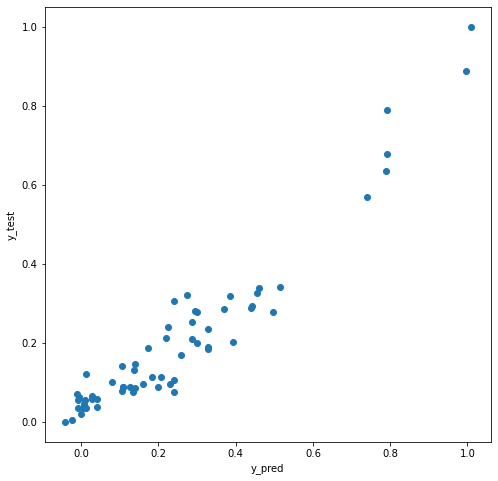

In [554]:
plt.figure(figsize=(8,8))
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.scatter(y_pred,y_test)
#plt.plot(y_pred,y_test,)#color='red')


In [555]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Sun, 02 May 2021   Prob (F-statistic):           1.57e-70
Time:                        00:44:57   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [556]:
# all p values are less than 0.05  
